# Machine Learning Model Comparison On Customer Churn

Source:

- Ehsan Nabatchian, Machine Learning Model Comparison On Customer Churn, https://medium.com/@ethannabatchian/machine-learning-model-comparison-on-customer-churn-2e607b3ea3f0
- Ethann93/ML-Model-Comparison-On-Customer-Churn, https://github.com/Ethann93/ML-Model-Comparison-On-Customer-Churn/blob/main/Machine%20Learning%20Model%20Comparison%20On%20Customer%20Churn%20(1)%20(1).ipynb


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, PredefinedSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


from xgboost import XGBClassifier
from xgboost import plot_importance


In [2]:
df = pd.read_csv('data/Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

### Average Balance of Customers Who Churned

In [7]:
average_churned_balance = df[df['Exited']==1]['Balance'].mean()
average_churned_balance

91108.53933726068

Customers who churned each took with them **€91,108.54, on average.**

## Modelling

### Feature Engineering

In [8]:
X = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [9]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Feature Transformation

In [10]:
X = pd.get_dummies(X, drop_first = True)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


### Split the Data Into X and Y(Target) Variables

In [12]:
X = X.drop('Exited', axis = 1).copy()

In [13]:
y = df['Exited']

### Split the Data Into Train and Test Sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2, 
                                                    stratify = y, 
                                                    random_state= 21)

### Model Building

In [15]:
dt = DecisionTreeClassifier(random_state = 0)

In [16]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [17]:
dt_pred = dt.predict(X_test)

### Performance Metrics

In [18]:
print("Accuracy:", "%.3f" % accuracy_score(y_test, dt_pred))
print("Precision:", "%.3f" % precision_score(y_test, dt_pred))
print("Recall:", "%.3f" % recall_score(y_test, dt_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, dt_pred))

Accuracy: 0.812
Precision: 0.538
Recall: 0.558
F1 Score: 0.548


### Confusion Matrix

In [19]:
def confusion_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data(test or validate).
    Returns a plot of confusion matrix for predictions on y data.
    '''
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
    display_labels=model.classes_)
    disp.plot(values_format='') # `values_format=''` suppresses scientific notation

    plt.show()

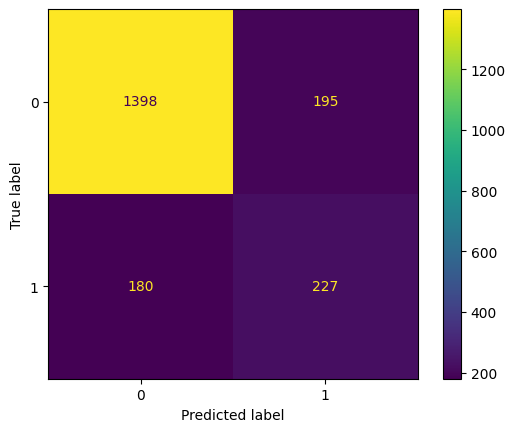

In [20]:
confusion_matrix_plot(dt, X_test, y_test)

The confusion matrix model correctly predicts many true negatives. This is to be expected, given that the dataset is imbalanced in favor of negatives. 

When the model makes an error, it appears slightly more likely to predict a false positive than a false negative, but it’s generally balanced. 

This is reflected in the precision and recall scores both being very close to each other.

## Plot Decison Tree

In [21]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

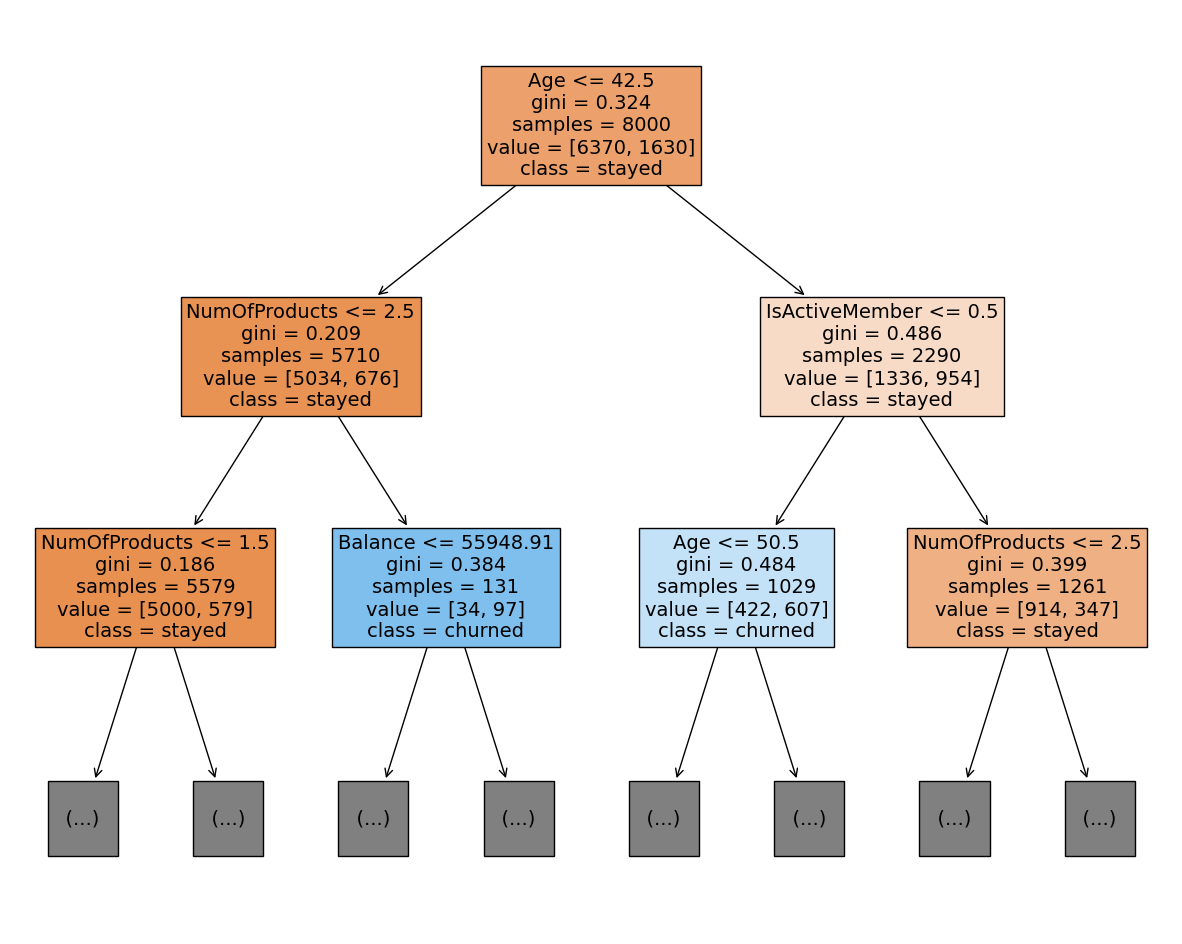

In [22]:
plt.figure(figsize=(15,12))

plot_tree(dt, max_depth=2, 
          fontsize=14, feature_names= X.columns.tolist(),
          class_names=['stayed','churned'], filled=True)

plt.show()


The first line of information in each node is the feature and split point that the model identified as being most predictive. In other words, this is the question that is being
asked at that split. For our root node, the question was: Is the customer less than or equal to 42.5 years old?

At each node, if the answer to the question it asks is “yes,” the sample would move to the child
node on the left. If the answer is “no,” the sample would go to the child node on the right.

gini refers to the node’s Gini impurity. This is a way of measuring how “pure” a node is. The
value can range from 0 to 0.5. A Gini score of 0 means there is no impurity—the node is a leaf, and all of its samples are of a single class. A score of 0.5 means the classes are all equally represented in that node.

samples is simply how many samples are in that node, and value indicates how many of each
class are in the node. Returning to the root node, we have value = [6370, 1630] Notice that
these numbers sum to 7,500, which is the number of samples in the node. This tells us that 6370
customers in this node stayed (y=0) and 1528 customers churned (y=1).

Lastly, we have class. This tells us the majority class of the samples in each node


## Tuned Decision Tree

In [23]:
tuned_dt= DecisionTreeClassifier(random_state = 21)

### HyperParameters 

In [24]:
tree_para = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

### Scoring Method

In [25]:
scoring = ['accuracy', 'precision', 'recall', 'f1']


In [26]:
clf = GridSearchCV(tuned_dt,
tree_para,
scoring = scoring,
cv=5,
refit="f1")



In [27]:
%%time
clf.fit(X_train, y_train)

CPU times: user 16.8 s, sys: 32.8 ms, total: 16.9 s
Wall time: 16.9 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=21),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [28]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_split=10, random_state=21)

In [29]:
 print("Best Average Validation Score: ", "%.4f" % clf.best_score_)

Best Average Validation Score:  0.5551


In [30]:
 def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.
    '''
    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)
    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    # Create table of results
    table = []
    table.append({'Model': model_name,
    'F1': f1,
    'Recall': recall,
    'Precision': precision,
    'Accuracy': accuracy
    }
    )
    table = pd.DataFrame(table)
    return table


In [31]:
result_table = make_results("Tuned Decision Tree", clf)
result_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.555083,0.455828,0.710639,0.851125


## Random Forest & Cross Validation

In [32]:
rf = RandomForestClassifier(random_state = 21)

In [33]:
cv_params = {'max_depth': [2,3,4,5, None],
            'min_samples_leaf': [1,2,3],
            'min_samples_split': [2,3,4],
            'max_features': [2,3,4],
            'n_estimators': [75, 100, 125, 150]
}


In [34]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [35]:
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')

In [36]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: user 21min 38s, sys: 1.67 s, total: 21min 39s
Wall time: 21min 45s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=21),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [75, 100, 125, 150]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [37]:
rf_cv.best_score_

0.57909424964747

In [38]:
rf_cv_results = make_results('Random Forest', rf_cv)
rf_cv_results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest,0.579094,0.471166,0.751437,0.8605


In [39]:
results = pd.concat([rf_cv_results, result_table])
results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest,0.579094,0.471166,0.751437,0.860500
0,Tuned Decision Tree,0.555083,0.455828,0.710639,0.851125


## Cross Validation

### Split the Data Into Separate Train and Test Sets

In [40]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, 
                                            test_size=0.2,
                                            stratify=y_train, 
                                            random_state=21)


Tune hyperparameters with GridSearchCV using a separate validation dataset. if the cv argument were left blank, it would split the data into five folds for cross-validation by default.

We’re going to tell it exactly which rows of X_train are for training, and which rows are for validation.

To do this, we need to make a list of length len(X_train) where each element is either a 0 or -1. 
A 0 in index "i" will indicate to GridSearchCV that index "i" of X_train is to be held out for validation.

A -1 at a given index will indicate that that index of X_train is to be used as training data.

If that index number is in X_val’s list of index numbers, then the list comprehension
appends a 0. If it’s not, then it appends a -1.

So if our training data is:
[A, B, C, D],

and our list is:
[-1, 0, 0, -1],

then GridSearchCV will use a training set of [A, D] and validation set of [B, C]


### List of Split Indicies

In [41]:
split_index = [0 if x in X_val.index else -1 for x in X_train.index]

In [42]:
custom_split = PredefinedSplit(split_index)

In [43]:
rf_val = GridSearchCV(rf, cv_params, scoring=scoring, cv=custom_split, refit='f1')

In [44]:
%%time
rf_val.fit(X_train, y_train)

CPU times: user 4min 20s, sys: 263 ms, total: 4min 20s
Wall time: 4min 21s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             estimator=RandomForestClassifier(random_state=21),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [75, 100, 125, 150]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [45]:
rf_val.best_params_

{'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [46]:
rf_val_results = make_results('Random Forest Validated', rf_val)

In [47]:
results = pd.concat([rf_val_results, results])

# Sort master results by F1 score in descending order
results.sort_values(by=['F1'], ascending=False)


,Model,F1,Recall,Precision,Accuracy
0,Random Forest Validated,0.604128,0.493865,0.777778,0.868125
0,Random Forest,0.579094,0.471166,0.751437,0.860500
0,Tuned Decision Tree,0.555083,0.455828,0.710639,0.851125


## XGBoosting

In [48]:
xgb = XGBClassifier(objective='binary:logistic', random_state=21)

In [49]:
cv_params = {'max_depth': [4,5,6,7,8],
            'min_child_weight': [1,2,3,4,5],
            'learning_rate': [0.1, 0.2, 0.3],
            'n_estimators': [75, 100, 125]
}

In [50]:
scoring = ['accuracy', 'precision', 'recall', 'f1']


In [51]:
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')


In [52]:
%%time
xgb_cv.fit(X_train, y_train)


CPU times: user 2h 46min 30s, sys: 12.5 s, total: 2h 46min 42s
Wall time: 4min 36s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=21, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [75, 100, 125]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [53]:
xgb_cv_results = make_results('XGBoost CV', xgb_cv)
xgb_cv_results


,Model,F1,Recall,Precision,Accuracy
0,XGBoost CV,0.588389,0.490798,0.734892,0.86


In [54]:
results = pd.concat([xgb_cv_results, results]).sort_values(by=['F1'], ascending=False)

results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest Validated,0.604128,0.493865,0.777778,0.868125
0,XGBoost CV,0.588389,0.490798,0.734892,0.860000
0,Random Forest,0.579094,0.471166,0.751437,0.860500
0,Tuned Decision Tree,0.555083,0.455828,0.710639,0.851125


### Confusion Matrix On Random Forest Validated (Champion Model)

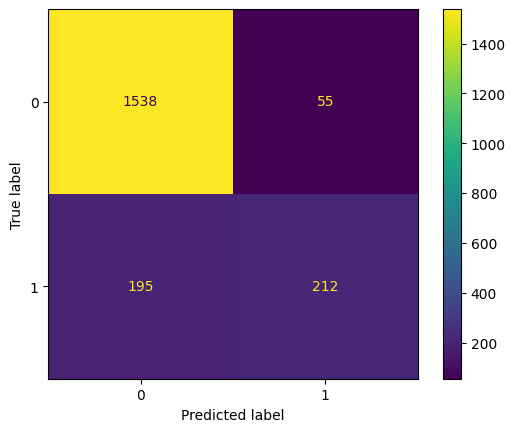

In [55]:
confusion_matrix_plot(rf_val, X_test, y_test)

Our Confusion Matrix in our our Random Forest validated model illustrates that, from the 2,000 people in our test data, 212 people left the bank, which is less than what our decision tree Matrix should (227). 

The confusion matrix indicates that, when the model makes an error, it’s
usually a Type II error—it gives a false negative by failing to predict that a customer will leave. On the other hand, it makes far fewer Type I errors, which are false positives.


### Feature Importance (For Champion Model)

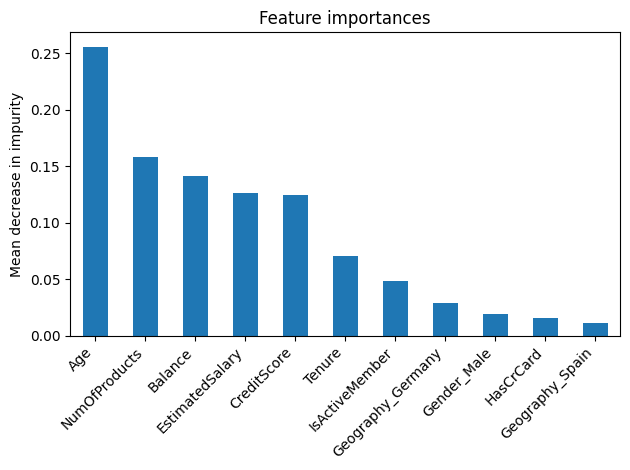

In [56]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)

# Sort values in descending order
rf_importances_sorted = rf_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
rf_importances_sorted.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')

# Rotate x-labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

fig.tight_layout()

This tells us that the four most important features used by our model were Age, Number of products, Balance and estimated Salary.